**IMPORTING LIBRARIES**

In [ ]:
# import the sys module
import sys
# import the files module from the google.colab package
from google.colab import files
# insert a new path to the Python system path list
sys.path.insert(0,'/content/drive/MyDrive/IR-Project-Colab')

In [ ]:
# import the drive module from the google.colab package
from google.colab import drive
# mount the Google Drive to the Colab virtual machine
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**IMPORTING UTILITIES AND KNNIMPUTE MODULES FROM GOOGLE DRIVE**

In [ ]:
# copy the Utilities.py file from the IR-Project-Colab directory in Google Drive to the Colab notebook directory
!cp /content/drive/MyDrive/IR-Project-Colab/Utilities.py /content 
# copy the KNNImpute.py file from the IR-Project-Colab directory in Google Drive to the Colab notebook directory
!cp /content/drive/MyDrive/IR-Project-Colab/KNNImpute.py /content

In [ ]:
# import the Utilities module
import Utilities
# import the KNNImpute module
import KNNImpute

**IMPORTING LIBRARIES**

In [ ]:
import pandas as pd  # Import pandas for data manipulation
import numpy as np  # Import numpy for mathematical operations
import nltk  # Import nltk for natural language processing
nltk.download('stopwords')  # Download the stopwords dataset from NLTK

from sklearn.naive_bayes import GaussianNB  # Import Gaussian Naive Bayes model
from sklearn.linear_model import LogisticRegression  # Import Logistic Regression model
from sklearn.ensemble import RandomForestClassifier  # Import Random Forest model

from sklearn.model_selection import train_test_split  # Import train_test_split function for splitting data

from sklearn.feature_extraction.text import TfidfVectorizer  # Import TfidfVectorizer for converting text to TF-IDF features

from sklearn.metrics import accuracy_score  # Import accuracy_score metric for evaluating model performance
from sklearn import metrics  # Import metrics for model evaluation
from sklearn.metrics import confusion_matrix  # Import confusion_matrix metric for evaluating model performance
from sklearn.metrics import classification_report  # Import classification_report metric for evaluating model performance

import math  # Import math module for mathematical functions

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**RETRIEVING TRAINING DATA**

In [ ]:
# Define a list of column names for the dataset
labels=["country", "sku_id", "title", "category_lvl1","category_lvl2","category_lvl3", "description", "price", "type"]

# Define a function to load the training dataset from a CSV file
def getTrainingDataset():
    return pd.read_csv('data_train.csv', header=None, names=labels)

# Call the getTrainingDataset function to load the raw data into a Pandas dataframe
raw_data = getTrainingDataset()

# Use a utility function to clean the data and split it into features and labels
train_df,Y1,Y2,Y3= Utilities.Cleaning_Data_Utility(raw_data)

# Print the first few rows of the cleaned training data
print(train_df.head())

                           category_lvl1 category_lvl2  \
0                                Fashion         Women   
1                        Health & Beauty   Bath & Body   
2  TV, Audio / Video, Gaming & Wearables         Audio   
3                        Health & Beauty     Hair Care   
4                        Health & Beauty    Men's Care   

             category_lvl3                                         titleDescp  
0              Muslim Wear  adana galleri suri squar hijab light pink ul l...  
1         Hand & Foot Care  cuba heartbreak eau de parfum spray ml oz form...  
2       Live Sound & Stage  andoer cm cellphon smartphon mini dual head om...  
3  Shampoos & Conditioners  anmyna complaint silki set shampoo ml conditio...  
4       Body and Skin Care  argit argiltubo green clay face bodi ml ul li ...  


**IMPUTING NULL VALUES**

In [ ]:
# Define a function to calculate null value statistics for a dataframe
def NullStatistics(df):
    # Calculate the number of missing values in each column
    missing_val = df.isnull().sum()
    print(missing_val)
    
    # Calculate the percentage of missing values in the entire dataframe
    total_cells = np.product(df.shape)
    missing_percent = (missing_val.sum()/total_cells) *100
    print(f'\nThe missing data percent is: {missing_percent}')

# Call the NullStatistics function to print null value statistics for the cleaned training data
NullStatistics(train_df)

# Call the preserve_label function from the KNNImpute utility to get unique values in the category columns
unique_label_c1, unique_label_c2, unique_label_c3 = KNNImpute.preserve_label(train_df)

# Call the encode function from the KNNImpute utility to perform encoding for the category_lvl3 column using KNN
KNNImpute.encode(['category_lvl1', 'category_lvl2', 'category_lvl3'],train_df)

# Call the impute function from the KNNImpute utility to impute missing values in the cleaned training data
train_df_imputed = KNNImpute.impute(train_df)

# Call the clean_csv function from the KNNImpute utility to clean the imputed training data
train_df_imputed =  KNNImpute.clean_csv(train_df_imputed,train_df)

# Call the NullStatistics function again to print null value statistics for the imputed and cleaned training data
NullStatistics(train_df_imputed)

category_lvl1       0
category_lvl2       0
category_lvl3    2135
titleDescp          0
dtype: int64

The missing data percent is: 1.4710746079431138


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


category_lvl1    0
category_lvl2    0
category_lvl3    0
Title_desc       0
dtype: int64

The missing data percent is: 0.0


**PRINTING UNIQUE LABELS FOR EACH CATEGORY**

In [ ]:
print(len(unique_label_c1))
print(len(unique_label_c2))
print(len(unique_label_c3))

9
57
185


**PERFORMING FEATURE EXTRACTION AND SPLITTING DATA INTO TRAINING AND TESTING**

In [ ]:
# Extract the 'Title_desc' column as the feature (X) from the imputed and cleaned training data
X = train_df_imputed['Title_desc']

# Extract the 'category_lvl1' column as the target variable (Y1) from the imputed and cleaned training data
Y1 = train_df_imputed['category_lvl1']

# Extract the 'category_lvl2' column as the target variable (Y2) from the imputed and cleaned training data
Y2 = train_df_imputed['category_lvl2']

# Extract the 'category_lvl3' column as the target variable (Y3) from the imputed and cleaned training data
Y3 = train_df_imputed['category_lvl3']

In [ ]:
# Create an instance of TfidfVectorizer to extract features from text data
feature_extraction = TfidfVectorizer(min_df = 1, stop_words = 'english' , lowercase = True)

# Use the fit_transform method of the TfidfVectorizer to extract features from the 'Title_desc' feature of the training data
X_train_features = feature_extraction.fit_transform(X)

In [ ]:
#Splitting Data Into Training And Testing
X_train, X_test , Y_train_cat_1 , Y_test_cat_1 = train_test_split(X_train_features, Y1, test_size = 0.3, random_state=3 , stratify = Y1)

**APPLYING RANDOM FOREST CLASSIFIER**

CATEGORY 1

In [ ]:
# Calculate the estimated number of trees using the square root of the number of training examples
number_of_trees = X_train.shape
estimated_trees = math.sqrt(number_of_trees[0])
estimated_trees = int(math.floor(estimated_trees))

# Print the estimated number of trees
print(estimated_trees)

159


In [ ]:
# Create a RandomForestClassifier instance for category 1 with the estimated number of trees
model_cat_1 = RandomForestClassifier(n_estimators = estimated_trees) 

# Train the model on the training data for category 1
model_cat_1.fit(X_train, Y_train_cat_1)

RandomForestClassifier(n_estimators=159)

In [ ]:
# Use the trained model for category 1 to predict the categories of the testing data
Y_pred_cat_1 = model_cat_1.predict(X_test)

# Calculate the accuracy of the model on the testing data for category 1
accuracy_on_testing_data_cat_1 = accuracy_score(Y_test_cat_1 , Y_pred_cat_1)

# Print the accuracy of the model on the testing data for category 1
print(accuracy_on_testing_data_cat_1)

0.9029857602204869


In [ ]:
# Print the accuracy of the model on the testing data for category 1
print('Accuracy score with Random Forest Classifier is : ')
print(metrics.accuracy_score(Y_test_cat_1 , Y_pred_cat_1)*100)

# Calculate the confusion matrix for category 1
mat_cat_1 = confusion_matrix(Y_test_cat_1, Y_pred_cat_1)

# Print the confusion matrix for category 1
print(mat_cat_1)

Accuracy score with Random Forest Classifier is : 
90.29857602204869
[[ 500    9    5    2   38    1   28    2    1]
 [   4  746    1    2   27    1   53   43    1]
 [   0    2 1629   13   56    0    8    1   10]
 [   0    0   31 1049  113    4    5    5    5]
 [   6    6   49   37 1664    4   25    7   16]
 [   0    0    3    9  118  337    8    0    0]
 [   7    4    3    3   18    1 2119   25    3]
 [   7   26    1    5   58    2   57  580   17]
 [   0    0   20    2   29    0    6    3 1205]]


In [ ]:
# Printing Classification Report
print(classification_report(Y_test_cat_1, Y_pred_cat_1))

              precision    recall  f1-score   support

         0.0       0.95      0.85      0.90       586
         1.0       0.94      0.85      0.89       878
         2.0       0.94      0.95      0.94      1719
         3.0       0.93      0.87      0.90      1212
         4.0       0.78      0.92      0.85      1814
         5.0       0.96      0.71      0.82       475
         6.0       0.92      0.97      0.94      2183
         7.0       0.87      0.77      0.82       753
         8.0       0.96      0.95      0.96      1265

    accuracy                           0.90     10885
   macro avg       0.92      0.87      0.89     10885
weighted avg       0.91      0.90      0.90     10885



CATEGORY 2

In [ ]:
#Splitting Data into Training And Testing
X_train, X_test , Y_train_cat_2 , Y_test_cat_2 = train_test_split(X_train_features, Y2 , test_size = 0.3, random_state=3 , stratify = Y2)

In [ ]:
# Get the number of rows in the training dataset
number_of_trees = X_train.shape

# Calculate the estimated number of trees using the square root of the number of rows
estimated_trees = math.sqrt(number_of_trees[0])

# Round down the estimated number of trees to an integer
estimated_trees = int(math.floor(estimated_trees))

# Print the estimated number of trees
print(estimated_trees)

159


In [ ]:
#Instantiate a RandomForestClassifier model with a specified number of estimators
model_cat_2 = RandomForestClassifier(n_estimators=estimated_trees)

#Train the model using the training set features and labels for category 2
model_cat_2.fit(X_train, Y_train_cat_2)

RandomForestClassifier(n_estimators=159)

In [ ]:
#Predict the category 2 labels for the testing set using the trained model
Y_pred_cat_2 = model_cat_2.predict(X_test)

#Calculate the accuracy score of the model on the testing set for category 2
accuracy_on_testing_data_cat_2 = accuracy_score(Y_test_cat_2, Y_pred_cat_2)

#Print the accuracy score of the model on the testing set for category 2
print(accuracy_on_testing_data_cat_2)

0.8182820395039044


In [ ]:
#Print the accuracy score of the model on the testing set for category 2 using Random Forest Classifier
print('Accuracy score with Random Forest Classifier is: ')

#Calculate and print the accuracy score of the model on the testing set for category 2
print(metrics.accuracy_score(Y_test_cat_2, Y_pred_cat_2) * 100)

#Create a confusion matrix for the category 2 labels in the testing set using the predicted labels and true labels
mat_cat_2 = confusion_matrix(Y_test_cat_2, Y_pred_cat_2)

#Print the confusion matrix for the category 2 labels in the testing set
print(mat_cat_2)

Accuracy score with Random Forest Classifier is: 
81.82820395039045
[[2040    6    0 ...    0    0    5]
 [  26  305    0 ...    0    1    1]
 [   6    0   34 ...    0    0    8]
 ...
 [   2    0    0 ...  608    3    3]
 [  23    3    0 ...   11  104    0]
 [  14    2    0 ...    0    0 1113]]


CATEGORY 3

In [ ]:
#Splitting Data Into Training and Testing
X_train, X_test , Y_train_cat_3 , Y_test_cat_3 = train_test_split(X_train_features, Y3 , test_size = 0.3, random_state=3 , stratify = Y3)

In [ ]:
#Calculate the number of rows in the training set
number_of_trees = X_train.shape

#Estimate the number of trees required for the RandomForestClassifier model using the square root of the number of rows
estimated_trees = math.sqrt(number_of_trees[0])

#Round down the estimated number of trees to an integer
estimated_trees = int(math.floor(estimated_trees))

#Print the estimated number of trees
print(estimated_trees)

159


In [ ]:
#Instantiate a RandomForestClassifier model with a specified number of estimators
model_cat_3 = RandomForestClassifier(n_estimators=estimated_trees)

#Train the model using the training set features and labels for category 3
model_cat_3.fit(X_train, Y_train_cat_3)

RandomForestClassifier(n_estimators=159)

In [ ]:
#Predict the category 3 labels for the testing set using the trained model
Y_pred_cat_3 = model_cat_3.predict(X_test)

#Calculate the accuracy score of the model on the testing set for category 3
accuracy_on_testing_data_cat_3 = accuracy_score(Y_test_cat_3, Y_pred_cat_3)

#Print the accuracy score of the model on the testing set for category 3
print(accuracy_on_testing_data_cat_3)

0.7292604501607717


In [ ]:
#Print the accuracy score of the model on the testing set for category 3 using Random Forest Classifier
print('Accuracy score with Random Forest Classifier is: ')

#Calculate and print the accuracy score of the model on the testing set for category 3
print(metrics.accuracy_score(Y_test_cat_3, Y_pred_cat_3) * 100)

#Create a confusion matrix for the category 3 labels in the testing set using the predicted labels and true labels
mat_cat_3 = confusion_matrix(Y_test_cat_3, Y_pred_cat_3)

#Print the confusion matrix for the category 3 labels in the testing set
print(mat_cat_3)

Accuracy score with Random Forest Classifier is: 
72.92604501607717
[[ 3  0  0 ...  0  0  0]
 [ 0 98  0 ...  0  0  1]
 [ 0  0 14 ...  0  0  0]
 ...
 [ 0  0  0 ... 12  0  0]
 [ 0  0  0 ...  2  5  0]
 [ 0  0  0 ...  0  0 22]]


**RETRIEVING TESTING DATA**

In [ ]:
#Define a list of column labels for the testing dataset
labels = ["country", "sku_id", "title", "category_lvl1", "category_lvl2", "category_lvl3", "description", "price", "type"]

#Define a function to load the testing dataset from a CSV file and return a Pandas DataFrame
def getTestingDataset():
  return pd.read_csv('data_valid.csv', header=None, names=labels)

#Load the raw testing dataset from the CSV file using the getTestingDataset function
raw_test_data = getTestingDataset()

#Clean the raw testing data by removing stopwords and lemmatizing the text features
#The cleaning function returns the cleaned data along with the category labels for each category
test_df, Y1, Y2, Y3 = Utilities.Cleaning_Data_Utility(raw_test_data) #Utilities is a helper module containing the cleaning function.

**IMPUTING NULL VALUES**


In [ ]:
#This function calculates the number of missing values in a DataFrame and the percentage of missing data.
def NullStatistics(df):
  missing_val = df.isnull().sum() # count the number of missing values in each column
  print(missing_val)
  total_cells = np.product(df.shape) # calculate the total number of cells in the DataFrame
  missing_percent = (missing_val.sum()/total_cells) *100 # calculate the percentage of missing data
  print(f'\nThe missing data percent is: {missing_percent}')

#Apply the NullStatistics function to a DataFrame to get the number and percentage of missing values before imputation.
NullStatistics(test_df)

#Get unique labels for each category in the DataFrame, which will be used later in the KNN imputation process.
unique_label_c1, unique_label_c2, unique_label_c3 = KNNImpute.preserve_label(test_df)

#Encode the categorical columns using one-hot encoding, which is required for KNN imputation.
KNNImpute.encode(['category_lvl1', 'category_lvl2', 'category_lvl3'],test_df)

#Perform KNN imputation on the DataFrame to fill in the missing values.
test_df_imputed = KNNImpute.impute(test_df)

#Clean up the DataFrame by converting back to its original categorical values and dropping any extra columns.
test_df_imputed = KNNImpute.clean_csv(test_df_imputed,test_df)

#Apply the NullStatistics function again to the imputed DataFrame to get the number and percentage of missing values after imputation.
NullStatistics(test_df_imputed)

category_lvl1      0
category_lvl2      0
category_lvl3    687
titleDescp         0
dtype: int64

The missing data percent is: 1.4508362899138367


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


category_lvl1    0
category_lvl2    0
category_lvl3    0
Title_desc       0
dtype: int64

The missing data percent is: 0.0


In [ ]:
#Extract the column 'Title_desc' from the imputed DataFrame and assign it to variable X.
X = test_df_imputed['Title_desc']

#Extract the column 'category_lvl1' from the imputed DataFrame and assign it to variable Y1.
Y1 = test_df_imputed['category_lvl1']

#Extract the column 'category_lvl2' from the imputed DataFrame and assign it to variable Y2.
Y2 = test_df_imputed['category_lvl2']

#Extract the column 'category_lvl3' from the imputed DataFrame and assign it to variable Y3.
Y3 = test_df_imputed['category_lvl3']

In [ ]:
# Transforming Features
X_test_features = feature_extraction.transform(X)

CATEGORY 1

In [ ]:
#Predicting On Testing Data
Y_Testing_Cat_1 = model_cat_1.predict(X_test_features)

0.8961817874640987
              precision    recall  f1-score   support

         0.0       0.95      0.84      0.89       646
         1.0       0.93      0.85      0.89       965
         2.0       0.93      0.95      0.94      1855
         3.0       0.92      0.86      0.89      1339
         4.0       0.77      0.92      0.84      1993
         5.0       0.98      0.64      0.77       525
         6.0       0.92      0.96      0.94      2328
         7.0       0.86      0.77      0.81       824
         8.0       0.96      0.94      0.95      1363

    accuracy                           0.90     11838
   macro avg       0.91      0.86      0.88     11838
weighted avg       0.90      0.90      0.90     11838



Text(0.5, 102.72222222222219, 'Predicted lable')

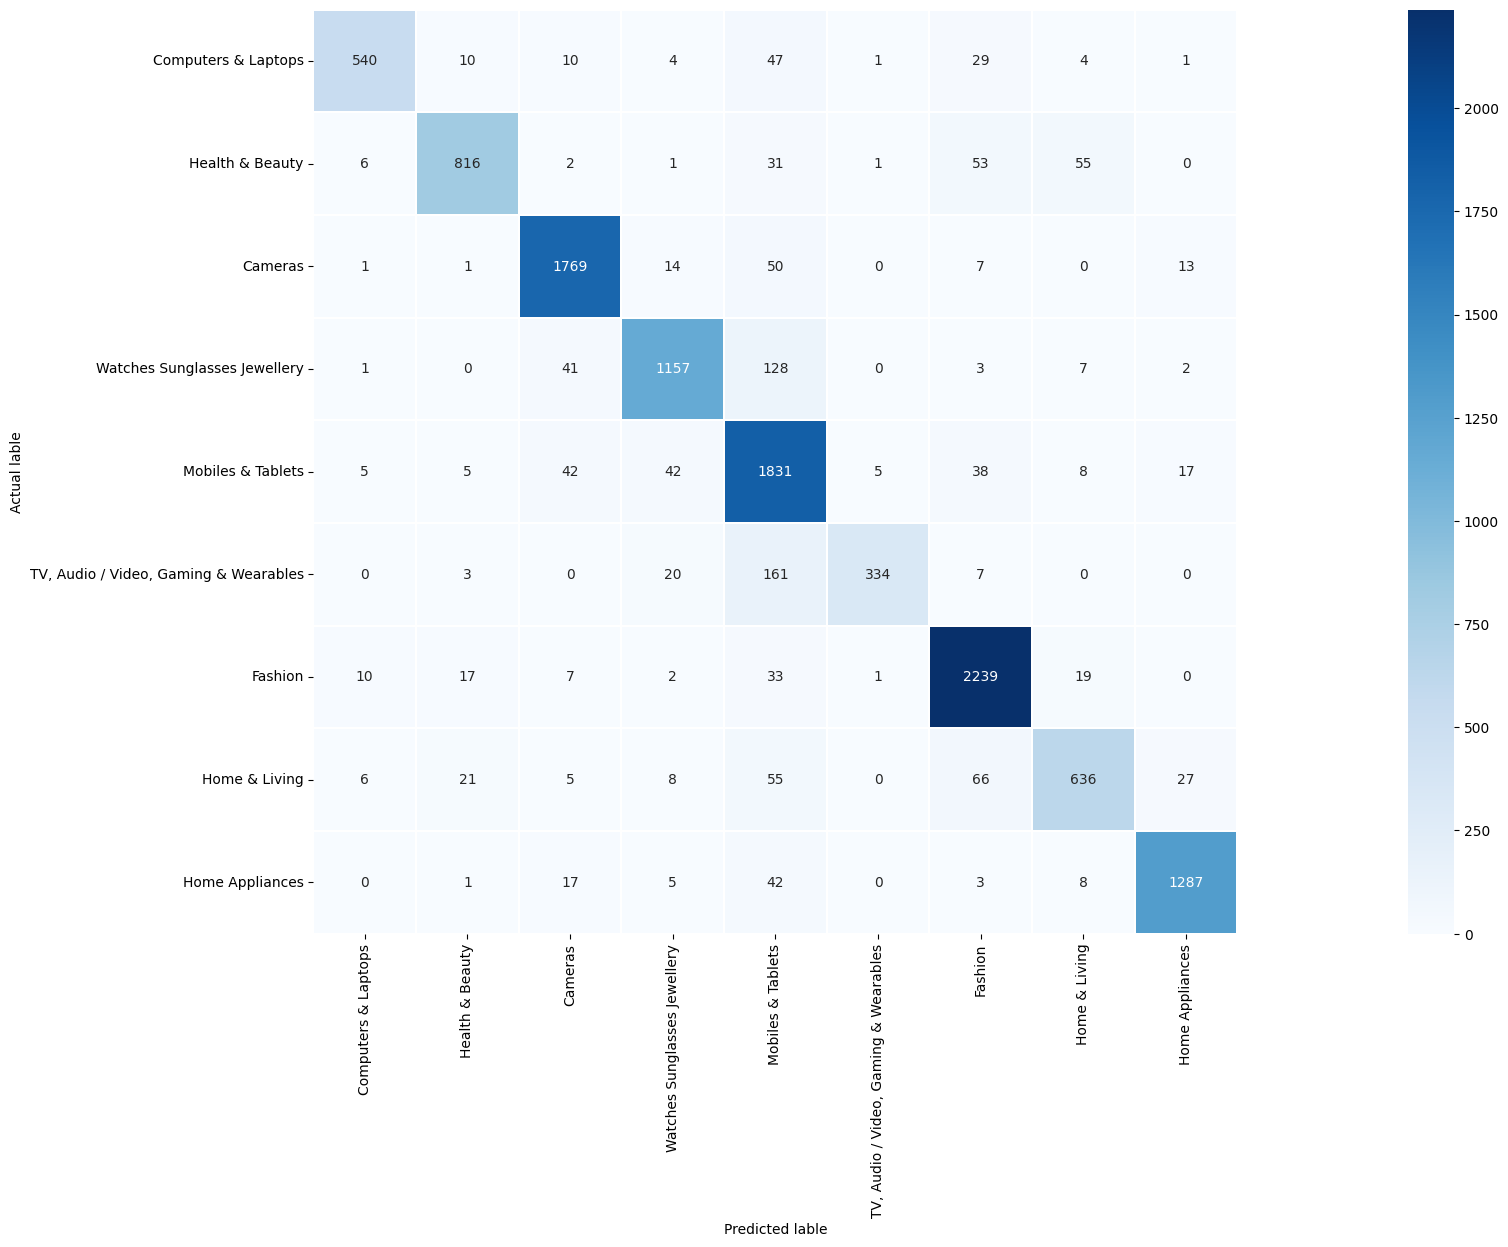

In [ ]:
#importing required libraries
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

#Checking Accuracy on Category 1 Model
accuracy_on_testing_data_cat_1 = accuracy_score(Y1 , Y_Testing_Cat_1)
print(accuracy_on_testing_data_cat_1)

cf_matrix = confusion_matrix(Y1, Y_Testing_Cat_1)  # Calculating the confusion matrix using the true values 'Y1' and predicted values 'Y_Testing_Cat_1'
print(classification_report(Y1, Y_Testing_Cat_1))  # Generating a classification report containing precision, recall, f1-score, and support metrics for each class

plt.figure(figsize=(44,12))  # Setting the size of the figure

sns.heatmap(cf_matrix,annot=True ,fmt='d',  cmap='Blues',square=True ,cbar=True, linewidths=.10, xticklabels= unique_label_c1, yticklabels= unique_label_c1  )  # Plotting a heatmap of the confusion matrix using Seaborn's heatmap function. 'annot=True' displays the values of the matrix, 'fmt='d'' specifies the format of the displayed values as integers, 'cmap='Blues'' sets the color map, 'square=True' sets the aspect ratio of the plot as square, 'cbar=True' displays the color bar, 'linewidths=.10' sets the width of the lines separating the boxes, 'xticklabels=unique_label_c1' and 'yticklabels=unique_label_c1' sets the x and y tick labels as the unique categories in Y2, respectively.

plt.ylabel('Actual lable')  # Setting the label of y-axis as 'Actual label'
plt.xlabel('Predicted lable')  # Setting the label of x-axis as 'Predicted label'

CATEGORY 2

In [ ]:
#Prediction on Testing Data
Y_Testing_Cat_2 = model_cat_2.predict(X_test_features)

0.8132285859097821
              precision    recall  f1-score   support

         0.0       0.83      0.98      0.90      2206
         1.0       0.78      0.86      0.82       381
         2.0       0.89      0.40      0.55        78
         3.0       0.80      0.50      0.62       111
         4.0       0.82      0.52      0.64       144
         5.0       0.88      0.85      0.86       124
         6.0       0.83      0.23      0.36        22
         7.0       0.86      0.75      0.80       256
         8.0       0.84      0.76      0.80       485
         9.0       1.00      0.93      0.96        41
        10.0       0.75      0.83      0.79       114
        11.0       0.85      0.58      0.69        19
        12.0       0.95      0.50      0.66        38
        13.0       1.00      0.37      0.54        19
        14.0       0.94      0.90      0.92       146
        15.0       0.83      0.85      0.84       151
        16.0       0.94      0.95      0.94       108
        

Text(0.5, 102.72222222222219, 'Predicted lable')

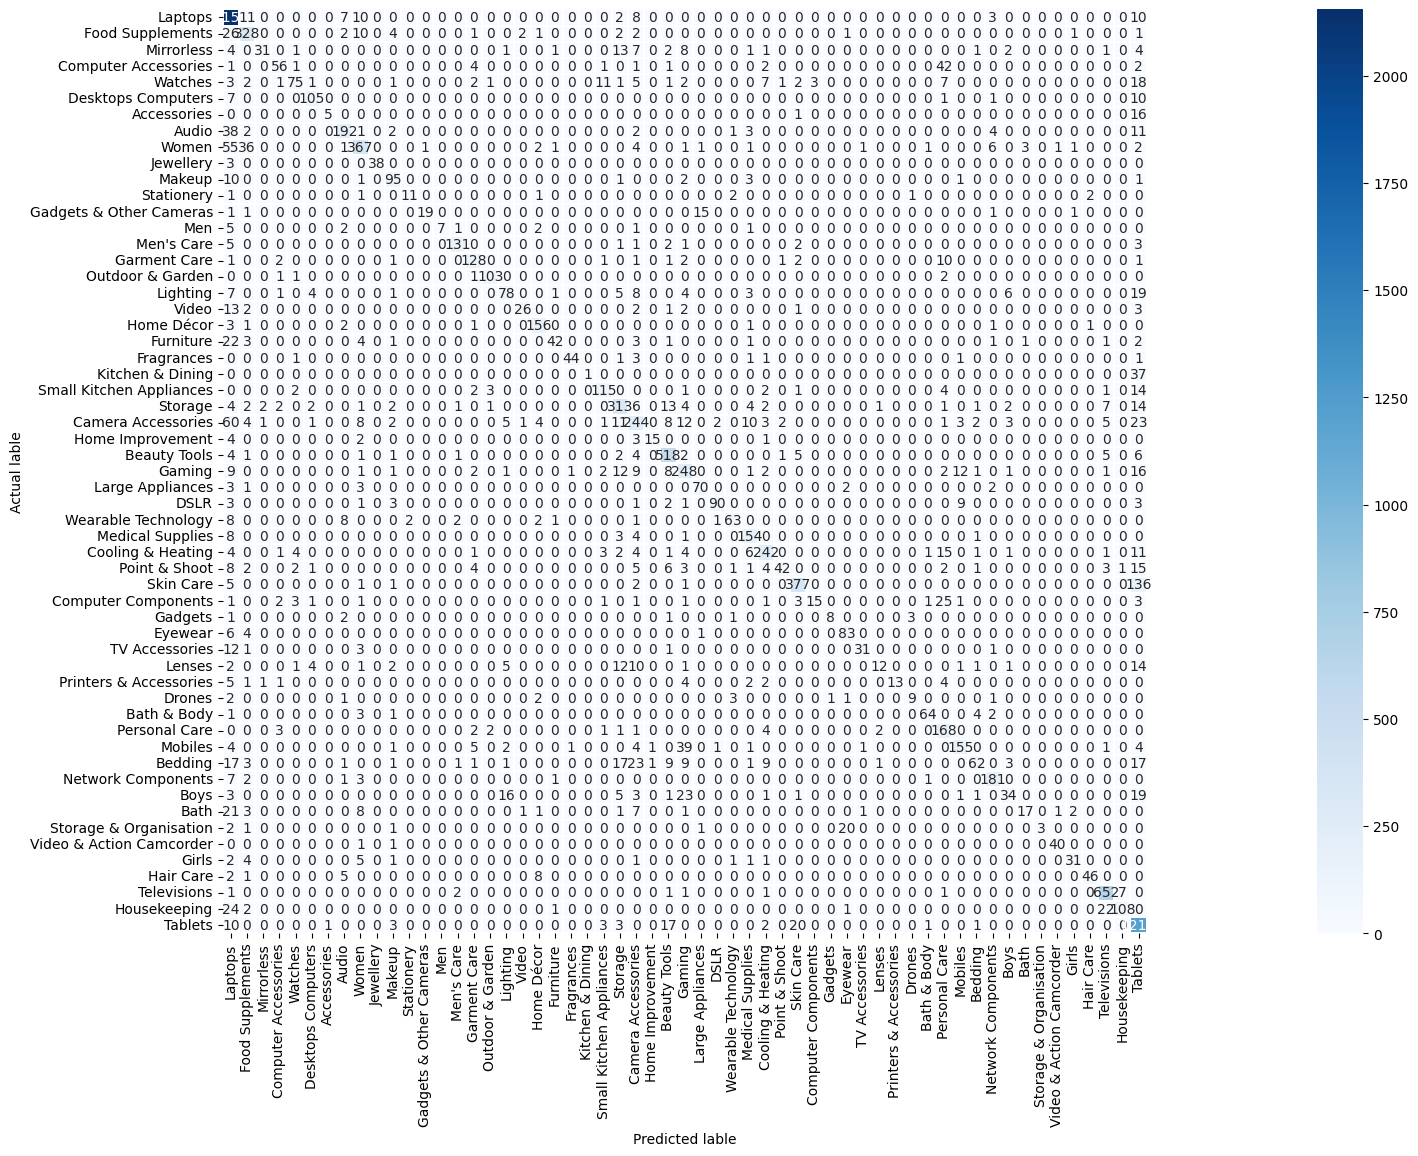

In [ ]:
#Checking Accuracy on Category 2 Model
accuracy_on_testing_data_cat_2 = accuracy_score(Y2 , Y_Testing_Cat_2)
print(accuracy_on_testing_data_cat_2)

cf_matrix = confusion_matrix(Y2, Y_Testing_Cat_2)  # Calculating the confusion matrix using the true values 'Y2' and predicted values 'Y_Testing_Cat_2'
print(classification_report(Y2, Y_Testing_Cat_2))  # Generating a classification report containing precision, recall, f1-score, and support metrics for each class

plt.figure(figsize=(44,12))  # Setting the size of the figure

sns.heatmap(cf_matrix,annot=True ,fmt='d',  cmap='Blues',square=True ,cbar=True, linewidths=.10, xticklabels= unique_label_c2, yticklabels= unique_label_c2)  # Plotting a heatmap of the confusion matrix using Seaborn's heatmap function. 'annot=True' displays the values of the matrix, 'fmt='d'' specifies the format of the displayed values as integers, 'cmap='Blues'' sets the color map, 'square=True' sets the aspect ratio of the plot as square, 'cbar=True' displays the color bar, 'linewidths=.10' sets the width of the lines separating the boxes, 'xticklabels=unique_label_c2' and 'yticklabels=unique_label_c2' sets the x and y tick labels as the unique categories in Y2, respectively.

plt.ylabel('Actual lable')  # Setting the label of y-axis as 'Actual label'
plt.xlabel('Predicted lable')  # Setting the label of x-axis as 'Predicted label'

CATEGORY 3

In [ ]:
#Prediction on Testing Data
Y_Testing_Cat_3 = model_cat_3.predict(X_test_features)

0.7191248521709749
              precision    recall  f1-score   support

         0.0       1.00      0.33      0.50        18
         1.0       0.83      0.53      0.65       187
         2.0       0.70      0.45      0.55        31
         3.0       0.47      0.53      0.49        40
         4.0       0.76      0.68      0.72        19
         5.0       0.88      0.81      0.84        36
         6.0       0.56      0.14      0.22        37
         7.0       0.34      0.50      0.41        20
         8.0       0.62      0.22      0.33        45
         9.0       0.78      0.92      0.84       283
        10.0       0.61      0.78      0.68        55
        11.0       0.67      0.29      0.40        21
        12.0       0.75      0.60      0.67        40
        13.0       0.80      0.35      0.48        23
        14.0       0.68      0.61      0.64       141
        15.0       0.92      0.85      0.89       110
        16.0       0.74      0.50      0.60        28
        

Text(0.5, 102.72222222222219, 'Predicted lable')

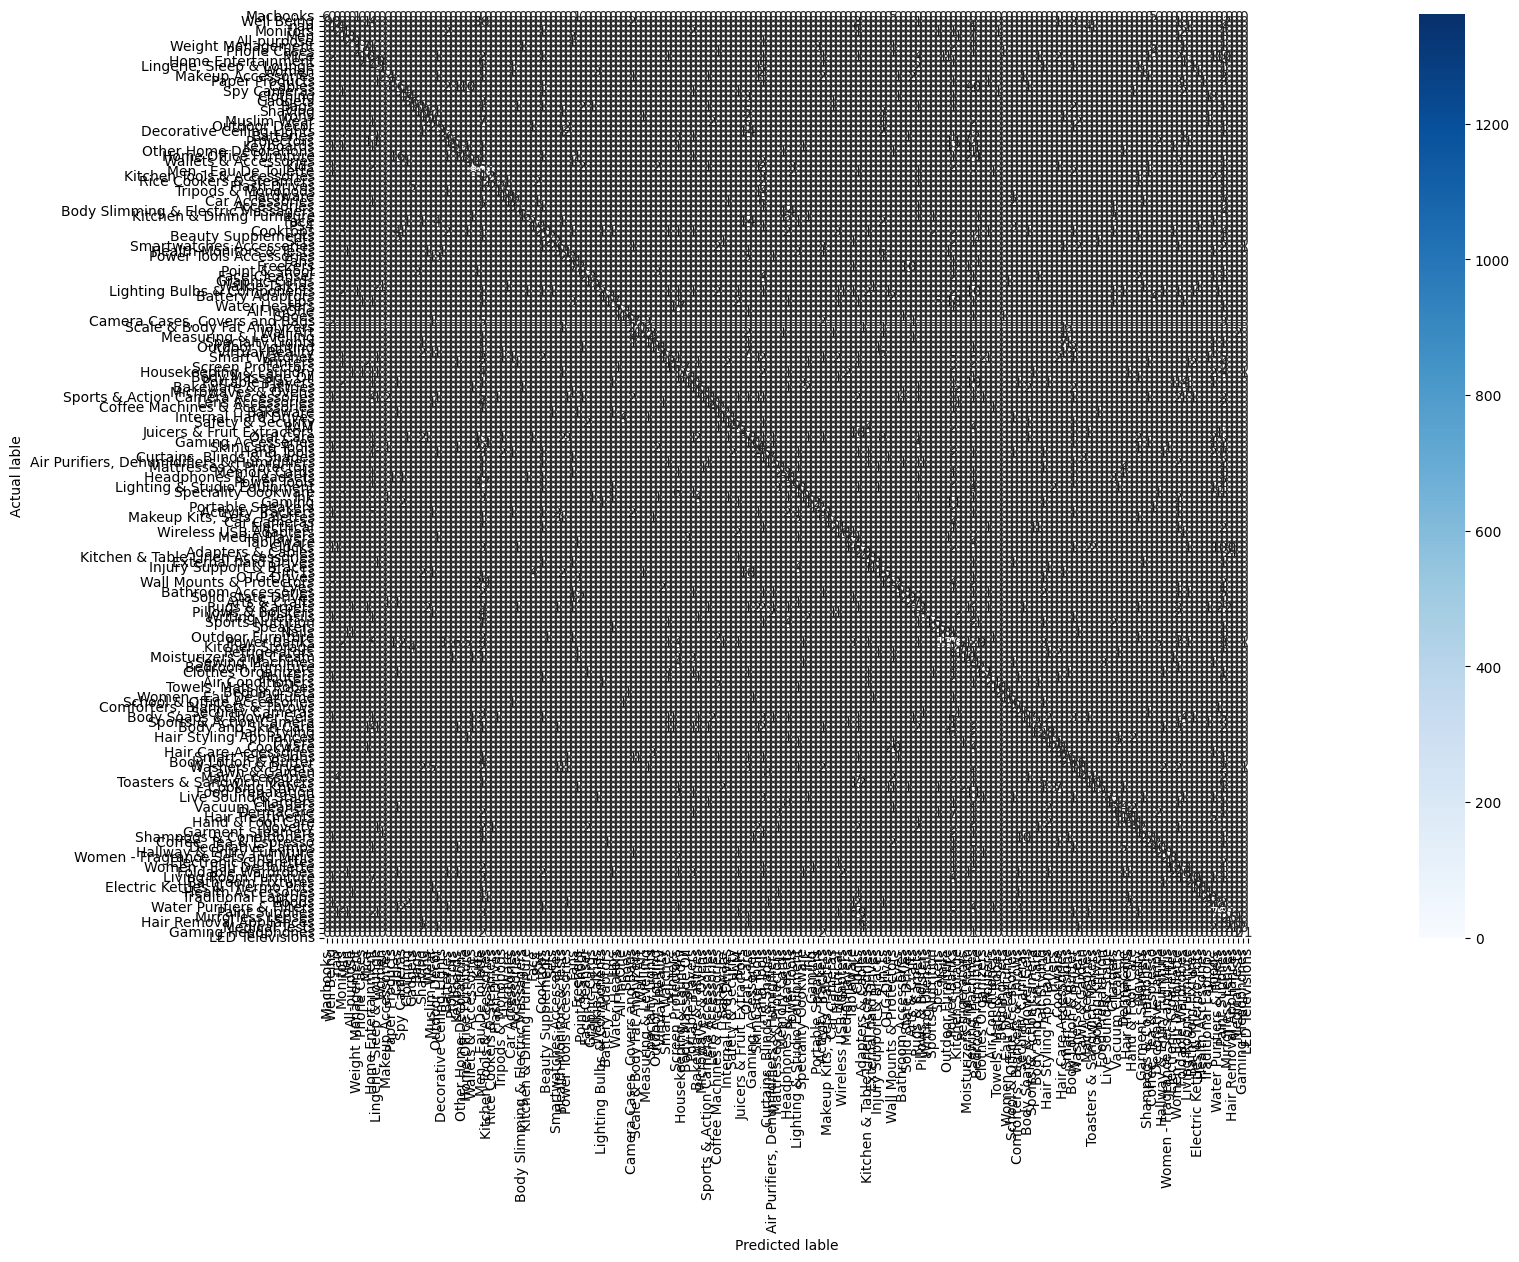

In [ ]:
#Checking Accuracy on Category 3 Model
accuracy_on_testing_data_cat_3 = accuracy_score(Y3 , Y_Testing_Cat_3)
print(accuracy_on_testing_data_cat_3)

cf_matrix = confusion_matrix(Y3, Y_Testing_Cat_3)  # Calculating the confusion matrix using the true values 'Y3' and predicted values 'Y_Testing_Cat_3'
print(classification_report(Y3, Y_Testing_Cat_3))  # Generating a classification report containing precision, recall, f1-score, and support metrics for each class

plt.figure(figsize=(44,12))  # Setting the size of the figure

sns.heatmap(cf_matrix,annot=True ,fmt='d',  cmap='Blues',square=True ,cbar=True, linewidths=.10, xticklabels= unique_label_c3, yticklabels= unique_label_c3)  # Plotting a heatmap of the confusion matrix using Seaborn's heatmap function. 'annot=True' displays the values of the matrix, 'fmt='d'' specifies the format of the displayed values as integers, 'cmap='Blues'' sets the color map, 'square=True' sets the aspect ratio of the plot as square, 'cbar=True' displays the color bar, 'linewidths=.10' sets the width of the lines separating the boxes, 'xticklabels=unique_label_c3' and 'yticklabels=unique_label_c3' sets the x and y tick labels as the unique categories in Y3, respectively.

plt.ylabel('Actual lable')  # Setting the label of y-axis as 'Actual label'
plt.xlabel('Predicted lable')  # Setting the label of x-axis as 'Predicted label'